# HW 4
1.
Repeat the fake/fair coin example covered in class with a prior probability of form 0.5Beta(20,3) + 0.5Beta(3,20) 

Derive the marginal likelihood and create plots similar to the ones in notes/ModelingExamples.ipynb section Fair/Fake coin.


\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5\mathcal{B}(\pi_1; 20, 3)+0.5\mathcal{B}(\pi_1; 3, 20) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

We already derived $\mathcal{p(m=0, X_{1:N})}=1/2(1/2)^N$ in class. For m=1;
\begin{eqnarray}
p(m=1, X_{1:N}) & = & \int d\pi_1 p(X_{1:N}|\pi_1) p(\pi_1|m=1) p(m=1) \\
& = & \int d\pi_1 {\pi_1}^{C_1} (1-\pi_1)^{C_0} \frac{1}{2} \left( \frac{\Gamma(23)}{\Gamma(20)\Gamma(3)} {\pi_1}^{19} (1-\pi_1)^2 
                                                      + \frac{\Gamma(23)}{\Gamma(3)\Gamma(20)} {\pi_1}^2 (1-\pi_1)^{19} \right) \frac{1}{2} \\
& = & \frac{\Gamma(23)}{4 \Gamma(20) \Gamma(3)} \left( \frac{\Gamma(C_1+20) \Gamma(C_0+3)}{\Gamma(C_0+C_1+23)} 
                                                        + \frac{\Gamma(C_1+3) \Gamma(C_0+20)}{\Gamma(C_0+C_1+23)} \right)
\end{eqnarray}

Log-odds ratio of these two marginal likelihoods will give whether the coin is fair($l(X)>0$) or fake($l(X)<0$):
\begin{eqnarray}
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
\end{eqnarray}

If we compare this two-Beta distribution with its pseudo-corresponding one-Beta distribution, which they have same standart deviation in total :
\begin{eqnarray}
\mathcal{B}(\pi_1; 6.16, 6.16)
\end{eqnarray}
one can easily see that two-Beta distribution predicts better, whereas one-Beta distribution rejects more which means sensitivity is lower than two-Beta distribution.

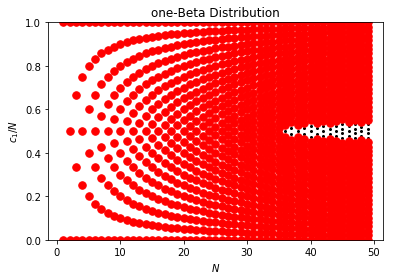

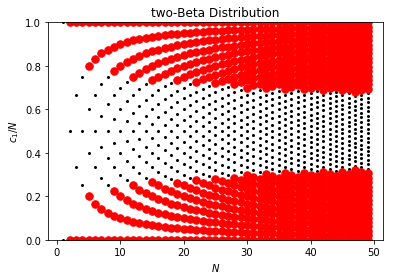

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln 

# These values satisfies corresponding one-Beta distribution with std.dev = 0.137 which is the total std.dev in two-Beta distr.
a = 6.16
b = 6.16

def log_oddsW1B(c0, c1):
    # Total number of tosses
    N = c0 + c1
    
    fair = (N+1)*np.log(0.5)
    fakeW1B = gammaln(a+b) - gammaln(a) - gammaln(b) +  gammaln(c0+a) + gammaln(c1+b) - gammaln(N+a + b)
    return fair - fakeW1B

def log_oddsW2B(c0, c1):
    # Total number of tosses
    N = c0 + c1
    
    fair = (N+1)*np.log(0.5)
    fakePart1 = gammaln(23)+gammaln(c1+20)+gammaln(c0+3)-np.log(4)-gammaln(20)-gammaln(3)-gammaln(c0+c1+23)
    fakePart2 = gammaln(23)+gammaln(c1+3)+gammaln(c0+20)-np.log(4)-gammaln(20)-gammaln(3)-gammaln(c0+c1+23)
    fakeW2B = np.log(np.exp(fakePart1)+np.exp(fakePart2))    
    return fair - fakeW2B

# Number of Zeros observed
c0 = 5
# Number of Ones
c1 = 6

# if bigger than zero it is FAIR, if smaller than 0, it is UNFAIR !
#print('log_odds = ', log_odds(c0, c1) )

f1 = plt.figure()
ax1 = f1.add_subplot(111)
    
f2 = plt.figure()
ax2 = f2.add_subplot(111)

for N in range(1, 50):
    lW1B = np.zeros(N+1)
    lW2B = np.zeros(N+1)
    for c in range(0,N+1):
        lW1B[c] = log_oddsW1B(N-c, c)
    for c in range(0,N+1):
        lW2B[c] = log_oddsW2B(N-c, c)
        
    idx1B = np.where( np.array(lW1B)<0 )
    idx2B = np.where( np.array(lW2B)<0 )
    p = np.arange(0,N+1)/N
        
    ax1.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    ax1.plot(N*np.ones_like(p[idx1B]), p[idx1B], '.r',markersize=15)
    
    ax2.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    ax2.plot(N*np.ones_like(p[idx2B]), p[idx2B], '.r',markersize=15)
    
#ax = plt.gca()
ax1.set_ylim((0,1))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$c_1/N$')
ax1.set_title('one-Beta Distribution')

ax2.set_ylim((0,1))
ax2.set_xlabel('$N$')
ax2.set_ylabel('$c_1/N$')
ax2.set_title('two-Beta Distribution')
plt.show()

$2.$ Suppose we observe the following dataset 
\begin{eqnarray} x_t \in 0,1 && for & t = 1 \dots 50\\ \end{eqnarray}
0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
\begin{eqnarray}
\pi_1 & \sim & \mathcal{B(1,1)}  && p(\pi_1) \\
\pi_2 & \sim & \mathcal{B(1,1)}  && p(\pi_2)
\end{eqnarray}

\begin{eqnarray}
x_i & \sim & \left\{ \begin{array}{cc} 
                            \mathcal{BE(x_i;\pi_1)} && p(x_i|\pi_1,n) = {\pi_1}^{X_{t \lt n}} (1-\pi_1)^{1-X_{t \lt n}} \\ 
                            \mathcal{BE(x_i;\pi_2)} && p(x_i|\pi_2,n) = {\pi_2}^{X_{t \ge n}} (1-\pi_2)^{1-X_{t \ge n}} \\ 
                        \end{array} \right. \\
n & \sim \mathcal{U(1,T)}                          
\end{eqnarray}

\begin{eqnarray}
p(n|X_{1:T}) = \frac{p(n,X_{1:T})}{p(X_{1:T})} = \frac{ \sum_i^2 p(n,\pi_i,X_{1:T}) }{p(X_{1:T})}
\end{eqnarray}

which nominator is equal to :

\begin{eqnarray}
\prod_i^2 p(n,\pi_i,X_{1:T}) & = & \int d\pi_1 p(n) p(\pi_1) p(X_{1:n-1}|\pi_1,n) * \int d\pi_2 p(n) p(\pi_2) p(X_{n:T}|\pi_2,n) \\
& = & \int d\pi_1 \left(\frac{n-1}{T}\right) \frac{\Gamma(2)}{\Gamma^2(1)} \prod_{i=1}^{n-1} {\pi_1}^{x_{i\lt n}} (1-\pi_1)^{1-x_{i\lt n}}
    * \int d\pi_2 \left(\frac{T-n+1}{T}\right) \frac{\Gamma(2)}{\Gamma^2(1)} \prod_{i=n}^T {\pi_2}^{x_{i \ge n}} (1-\pi_2)^{1-x_{i \ge n}} \\
& = & \int d\pi_1 \left(\frac{n-1}{T}\right) \frac{\Gamma(2)}{\Gamma^2(1)} {\pi_1}^{C_1} (1-\pi_1)^{C_0} 
    * \int d\pi_2 \left(\frac{T-n+1}{T}\right) \frac{\Gamma(2)}{\Gamma^2(1)} {\pi_2}^{D_1} (1-\pi_2)^{D_0} & where & C_1 = \sum_0^{n-1} x_i & and & C_0 = 1 - \sum_0^{n-1} x_i & and & D_1 = \sum_n^T x_i & and & D_0 = 1 - \sum_n^T x_i  \\   
& = & \frac{n-1}{T} \frac{\Gamma(2)}{\Gamma^2(1)} \frac{\Gamma(C_1+1) \Gamma(C_0+1)}{\Gamma(C_1+C_0+2)} 
    * \frac{T-n+1}{T} \frac{\Gamma(2)}{\Gamma^2(1)} \frac{\Gamma(D_1+1) \Gamma(D_0+1)}{\Gamma(D_1+D_0+2)}
\end{eqnarray}

then we need denominator :
\begin{eqnarray}
p(X_{1 \dots T} = \sum_{n=1}^T p(n,X_{1 \dots T}) & = & \sum_{n=1}^T \left( \frac{n-1}{T} \frac{\Gamma(C_1+1) \Gamma(C_0+1)}{\Gamma(C_1+C_0+2)} * \frac{T-n+1}{T} \frac{\Gamma(D_1+1) \Gamma(D_0+1)}{\Gamma(D_1+D_0+2)} \right)\\
& = & \sum_{n=1}^T \left( \frac{n-1}{T} \frac{\Gamma(C_1+1) \Gamma(C_0+1)}{\Gamma(n+2)} * \frac{T-n+1}{T} \frac{\Gamma(D_1+1) \Gamma(D_0+1)}{\Gamma(T-n+3)} \right)
\end{eqnarray}

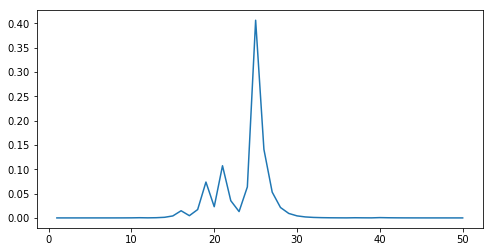

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gammaln 

def posteriorN():
    pJoint = np.zeros(T)
    for n in range(1,T+1):
        leftObs = obs[0:n-1]
        rightObs = obs[n-1:T]
        c1 = sum(leftObs)
        c0 = sum(leftObs!=1)
        d1 = sum(rightObs)
        d0 = sum(rightObs!=1)
        if (n-1)!=0:
            pJointPart1 = np.log((n-1)/T) + gammaln(2) - 2*gammaln(1) + gammaln(c1+1) + gammaln(c0+1) - gammaln(c0+c1+2)
        else:
            pJointPart1 = - np.Inf
            
        if (T-n+1)!=0:
            pJointPart2 = np.log((T-n+1)/T) + gammaln(2) - 2*gammaln(1) + gammaln(d1+1) + gammaln(d0+1) - gammaln(d0+d1+2)
        else:
            pJointPart1 = - np.Inf
        pJoint[n-1] = np.exp(pJointPart1+pJointPart2)
            
    # Normalize p(n,X) over nn    
    pNormalize = 0
    pNormalizePart1 = 0
    pNormalizePart2 = 0
    for nn in range(1,T+1):
        leftObs = obs[0:nn-1]
        rightObs = obs[nn-1:T]
        cc1 = sum(leftObs)
        cc0 = sum(leftObs!=1)
        dd1 = sum(rightObs)
        dd0 = sum(rightObs!=1)
        if (nn-1)!=0:
            pNormalizePart1 = np.log((nn-1)/T) + gammaln(cc1+1) + gammaln(cc0+1) - gammaln(cc0+cc1+2)
        if (T-nn+1)!=0:
            pNormalizePart2 = np.log((T-nn+1)/T) + gammaln(dd1+1) + gammaln(dd0+1) - gammaln(dd0+dd1+2)
        pNormalize += np.exp(pNormalizePart1+pNormalizePart2)
        
    return pJoint/pNormalize
    
obs = np.array([0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1])
T = len(obs)

plt.figure(figsize=(8,4))
x = np.arange(1,51)
y = posteriorN()

plt.plot(x,y)
plt.show()